# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to emplyee productivity.  What recommendations would you make so that employees can be as productive as possible?



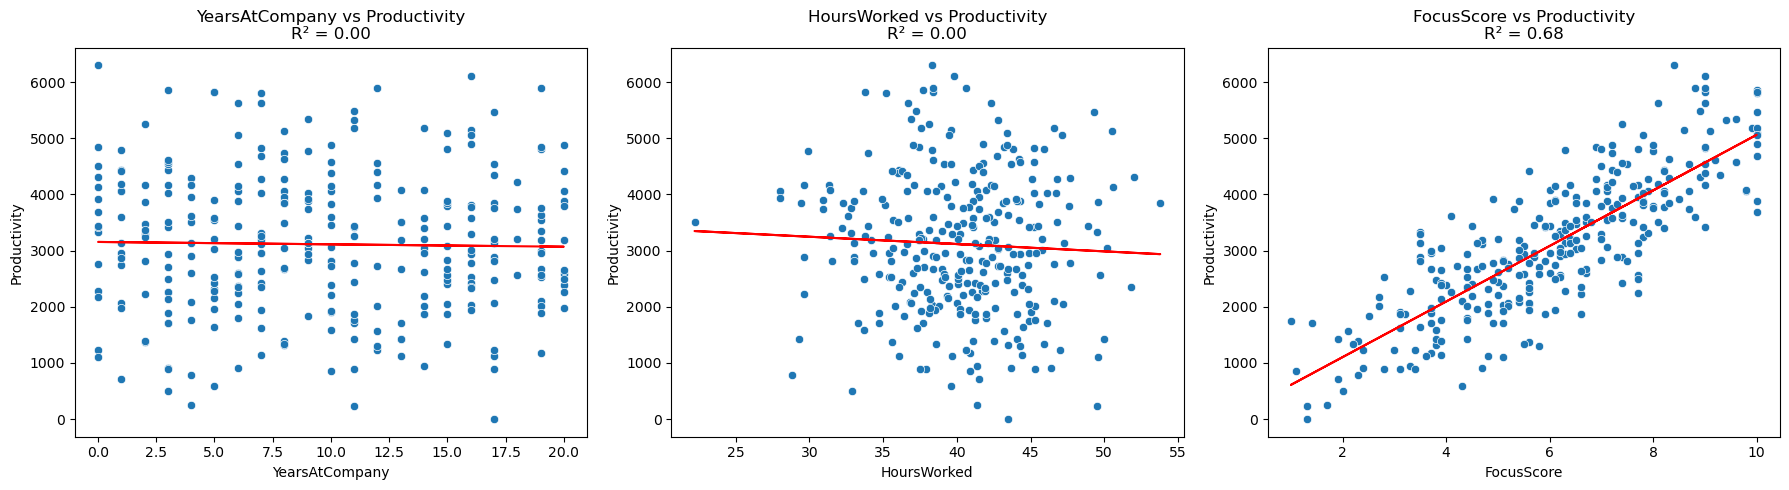

R-squared values:
YearsAtCompany: 0.000
HoursWorked: 0.003
FocusScore: 0.678

Multivariate Model R²: 0.685

Feature Coefficients:
                       Feature  Coefficient
1                   FocusScore   512.719278
8          DeskLocation_Remote  -229.752983
5         Department_Marketing  -136.240520
7  DeskLocation_Private Office  -103.411959
4                Department_HR   -93.398401
6             Department_Sales   -49.817366
3          TeamMeetingsPerWeek    27.170621
0                  HoursWorked    -4.664225
2               YearsAtCompany     3.400789


C:\Users\nekao\AppData\Local\Temp\ipykernel_26992\31376565.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeffs, x='Coefficient', y='Feature', palette='coolwarm')


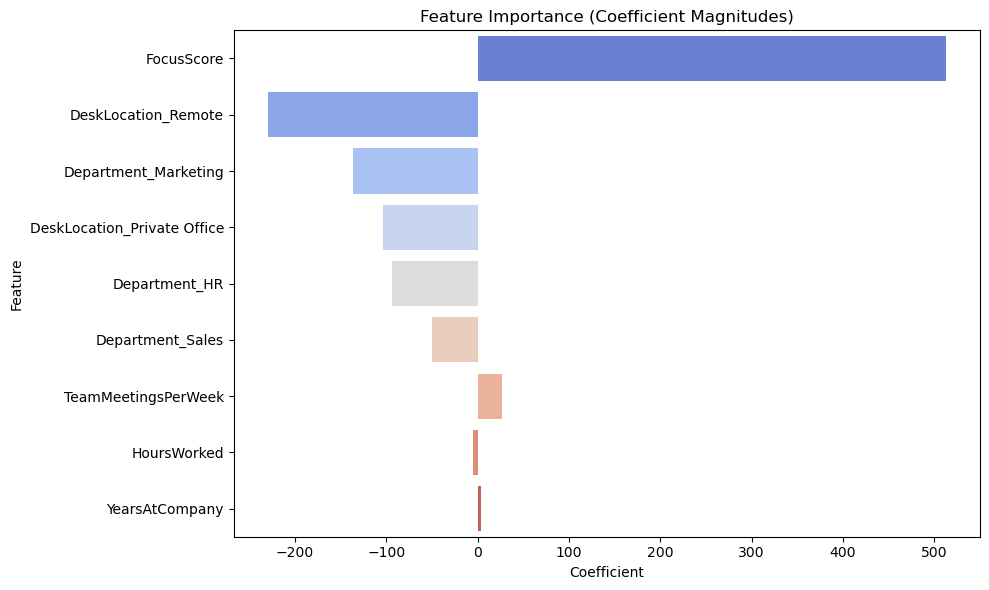

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.read_csv("Employee_productivity.csv")


target = 'ProductivityScore'
features = ['YearsAtCompany', 'HoursWorked', 'FocusScore']
r_squared = {}

plt.figure(figsize=(18, 5))
for i, feature in enumerate(features):
    X = df[[feature]]
    y = df[target]
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    r_squared[feature] = r2

    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=feature, y=target, data=df)
    plt.plot(df[feature], y_pred, color='red')
    plt.title(f"{feature} vs Productivity\nR² = {r2:.2f}")
    plt.xlabel(feature)
    plt.ylabel("Productivity")

plt.tight_layout()
plt.show()

if 'MeetingsAttended' in df.columns:
    X_meet = df[['MeetingsAttended']]
    y_meet = df[target]
    
    model_meet = LinearRegression()
    model_meet.fit(X_meet, y_meet)
    y_meet_pred = model_meet.predict(X_meet)
    
    r2_meet = r2_score(y_meet, y_meet_pred)
    r_squared['MeetingsAttended'] = r2_meet

    plt.figure(figsize=(6, 5))
    sns.scatterplot(x='MeetingsAttended', y=target, data=df)
    plt.plot(df['MeetingsAttended'], y_meet_pred, color='red')
    plt.title(f"Meetings Attended vs Productivity\nR² = {r2_meet:.2f}")
    plt.xlabel("Meetings Attended")
    plt.ylabel("Productivity")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Column 'MeetingsAttended' not found in dataset.")

print("R-squared values:")
for feature, r2 in r_squared.items():
    print(f"{feature}: {r2:.3f}")

df_encoded = pd.get_dummies(df, columns=['Department', 'DeskLocation'], drop_first=True)

X_all = df_encoded.drop(columns=['ProductivityScore'])
y_all = df_encoded['ProductivityScore']

model_all = LinearRegression()
model_all.fit(X_all, y_all)
predictions = model_all.predict(X_all)
r2_multi = r2_score(y_all, predictions)

print(f"\nMultivariate Model R²: {r2_multi:.3f}")

coeffs = pd.DataFrame({
    'Feature': X_all.columns,
    'Coefficient': model_all.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients:")
print(coeffs)

plt.figure(figsize=(10, 6))
sns.barplot(data=coeffs, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Feature Importance (Coefficient Magnitudes)")
plt.tight_layout()
plt.show()


When looking at the data it is clear that Focus score has the most positive impact and team meetings per week are also in the positive coefficient. While the rest are in the negitive coeffcient.